In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
from pandas_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
credit_data=pd.read_csv("/content/drive/MyDrive/ML project/creditcard.csv")

In [ ]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**The dataset has 31 attributes:**<br>

> Time, amount, class and other 28 features.<br>
- Time represents the time elapsed between the first
transaction in the dataset, and the current transaction. It is then shown as an increasing number of seconds going down the column. <br>
- Amount shows the amount of transaction that can be deposited or withdrawn.<br>
- Other features V1-V28 are a result of a dimensionality reduction using principal component analysis (PCA), as they may carry some personal information and cannot be revealed to public users of an open source database and to ensure protection and security of their identity. <br>
**Principal component analysis** (PCA): is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.<br>
- The last column, Class, is considered to be our label. It takes values 0 and 1; 1 for a fraudulent transaction and 0 otherwise.








In [ ]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

It can be noticed that no null values are there in the credit card dataset. Features (V1-V28) are already scaked as this is one main necessary step to correcly implement PCA technique. In order to have an equal consideration of feature importance, we will need to standardize "**Amount**" and "**Time**" features.

In [ ]:
credit_data.drop_duplicates(inplace=True)
credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# !pip install pandas-profiling==2.7.1

In [ ]:
# pp.ProfileReport(credit_data)

1801 duplicate rows are removed from the dataset. Duplicates increase the bias of the classification model we are using to those examples.

In [ ]:
#The percentage of the Fraud and non Fraud transactions rounded to two decimal points
num_fraud=credit_data.Class.value_counts()[1]
num_legit=credit_data.Class.value_counts()[0]
print(round(num_legit/len(credit_data) * 100,2))
print(round(num_fraud/len(credit_data) * 100,2))

99.83
0.17


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target class distribution')

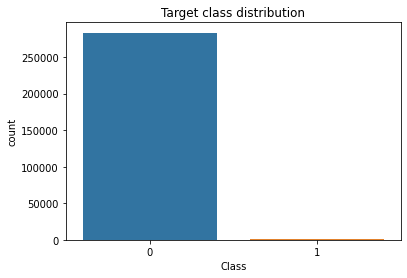

In [ ]:
sns.countplot('Class', data=credit_data)
plt.title("Target class distribution")

From the countplot shown above as well as the earlier made calculations, it can be easily noticed how much imbalanced the data is. The non-fraud examples are much greater than that of the fraud tansactions examples out dataset have. Although, the nature of the dataset is different, and it emulates the reality, such imbalance may result in a biased model towards non-fraud class and hence an overfitted classification model. One effective technique to balance the data is to use "sub-sampling".

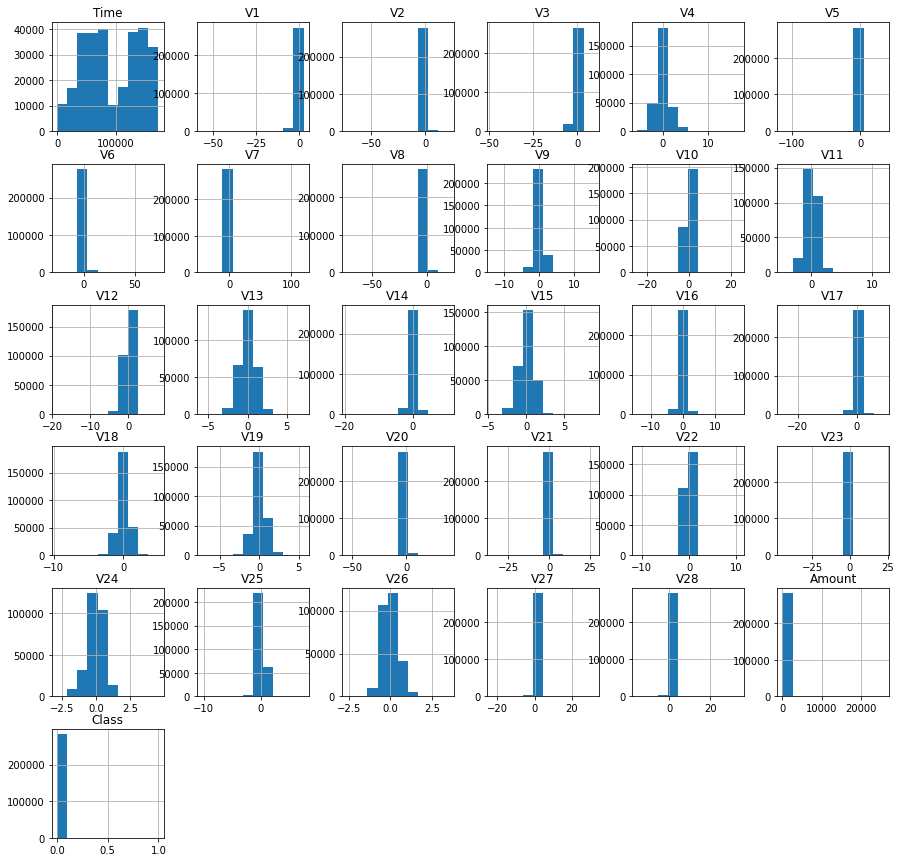

In [ ]:
credit_data.hist(figsize = (15, 15))
plt.show()

As PCA implementation makes sure that the data is normalized and standardized, we can notice that the histograms of the features (V1-V28) are all having a zero mean and 1 variance, however this may be not so perfect. It can be due to the effect of outliers that disturb the distribution a little bit. "Time" and "Amount" should also be standardized, so we have equal consideration of features importance.

##Feature density plot

<Figure size 432x288 with 0 Axes>

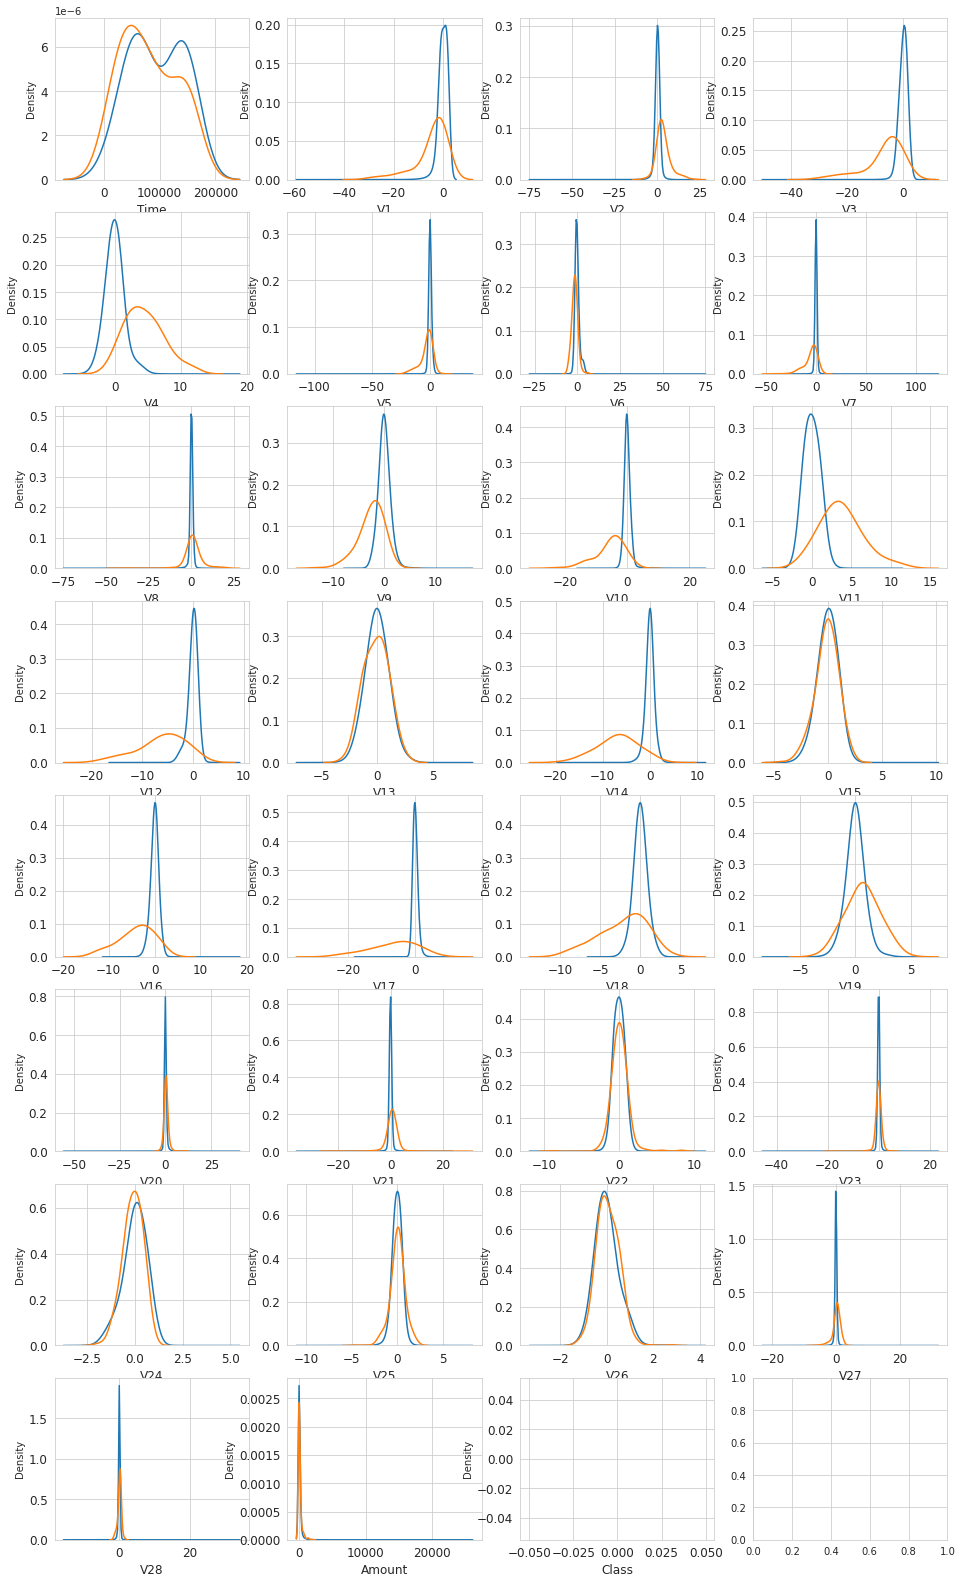

In [ ]:
warnings.filterwarnings("ignore")
var = credit_data.columns.values

i = 0
t0 = credit_data.loc[credit_data['Class'] == 0]
t1 = credit_data.loc[credit_data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

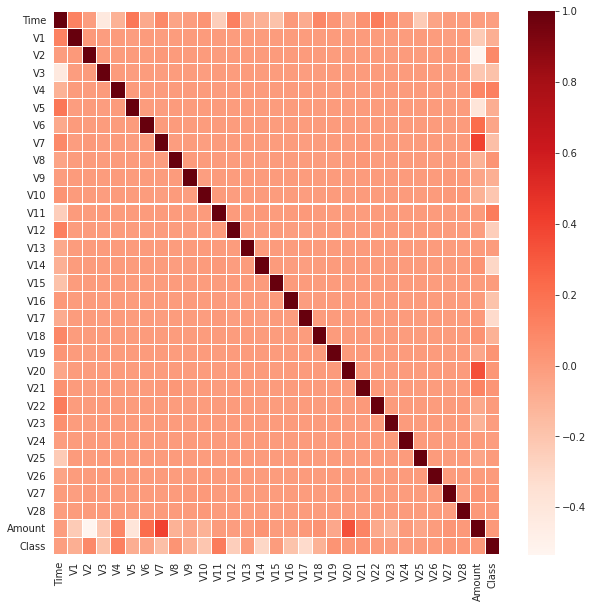

In [ ]:
correlation_matrix = credit_data.corr()
fig = plt.figure(figsize = (10, 10))

sns.heatmap(correlation_matrix,xticklabels=correlation_matrix.columns,yticklabels=correlation_matrix.columns,linewidths=.1,cmap="Reds")
plt.show()

The correlation heat map above shows that the features V2, V4, V11, V19 and V8 are the most higher positively correlated to the "class" label. V10, V12, V14, V16 and V17 are the highly negatively correlated features to the "class" label.

##Data Normalization and Standardization

In [ ]:
std=StandardScaler()
credit_data['std_amount'] = std.fit_transform(credit_data.Amount.values.reshape(-1,1))
credit_data['std_time'] = std.fit_transform(credit_data.Time.values.reshape(-1,1))

credit_data.drop(['Time','Amount'], axis=1, inplace=True)
credit_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781


In [ ]:
credit_data.drop(['std_time'], axis=1, inplace=True) #it gives false correlation

In [ ]:
credit_data.sample(frac=1, random_state=101)
Fraud = credit_data[credit_data.Class==1]
Legit = credit_data[credit_data.Class==0][:num_fraud]
balanced_data = pd.concat([Fraud,Legit])
balanced_data = balanced_data.sample(frac=1)
balanced_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount
250,-0.365532,1.006932,1.108304,-0.428694,0.590513,0.105474,0.602926,0.132310,-0.636398,-0.152232,0.324882,0.469856,0.556565,0.187393,0.187946,0.715896,-1.091380,0.472923,0.740916,0.165873,-0.250031,-0.663325,-0.189399,-0.845682,-0.055760,0.124845,0.263525,0.099579,0,-0.349773
151,1.057021,-0.646956,0.729167,-0.569262,-1.174307,-0.527625,-0.471677,0.051744,1.904018,-1.176609,-0.164333,0.760979,-0.608953,-0.052130,1.005992,-1.168464,0.488781,-0.343177,0.176031,-0.070137,0.186184,0.743093,-0.163619,0.453570,0.615479,-0.508562,0.089553,0.037617,0,-0.077767
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0,-0.333399
109,1.239048,0.293284,0.086472,1.178277,0.373344,0.325596,0.119319,-0.025476,0.173211,-0.154186,-1.089323,0.870714,1.177662,-0.217738,-0.161084,-0.533763,-0.108368,-0.848425,-0.056693,-0.103570,-0.148136,-0.111893,-0.173207,-0.714729,0.817360,-0.263843,0.047777,0.008735,0,-0.349333
116404,-2.250535,2.365755,-2.955491,0.089791,-2.830745,-0.844462,-0.174062,-0.407138,0.174216,-2.998926,2.605169,-3.677717,-0.961255,-4.629481,1.942182,-4.180379,-4.605686,-2.557184,1.589582,-0.486537,0.256560,-0.466245,0.291105,0.242567,-1.279094,-1.123534,-0.630977,0.326839,1,0.889809


Text(0.5, 1.0, 'Target class distribution after balancing')

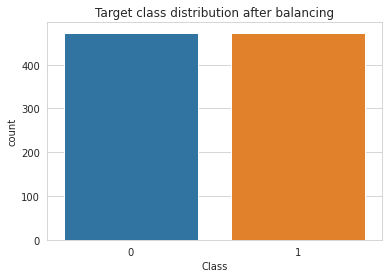

In [ ]:
sns.countplot('Class', data=balanced_data)
plt.title("Target class distribution after balancing")

In [ ]:
balanced_data.corr().Class

# fig = plt.figure(figsize = (10, 10))

# sns.heatmap(balanced_corr_matrix, vmax = .8, square = True)
# plt.show()

V1           -0.413707
V2            0.468907
V3           -0.609888
V4            0.681641
V5           -0.363033
V6           -0.481828
V7           -0.476199
V8            0.125395
V9           -0.562256
V10          -0.630530
V11           0.668626
V12          -0.697562
V13          -0.015156
V14          -0.733271
V15          -0.151228
V16          -0.569380
V17          -0.542477
V18          -0.422827
V19           0.264130
V20           0.169220
V21           0.119107
V22           0.097579
V23          -0.028417
V24          -0.106387
V25          -0.071703
V26           0.049073
V27           0.104725
V28           0.115438
Class         1.000000
std_amount    0.105485
Name: Class, dtype: float64

In [ ]:
#x=balanced_data.drop('Class',axis=1)
#y=balanced_data['Class']
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [ ]:
#logmodel = LogisticRegression(max_iter= 150)
#logmodel.fit(x_train,y_train)
#predictions = logmodel.predict(x_test)
#accuracy_score(y_test, predictions)

In [ ]:
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,predictions)
#conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#plt.figure(figsize = (8,5))
#sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
#recall_score(y_test,predictions)

+ve corr => V19, V11, V4, V2 <br>
-ve corr => V14, V12, V10, V16

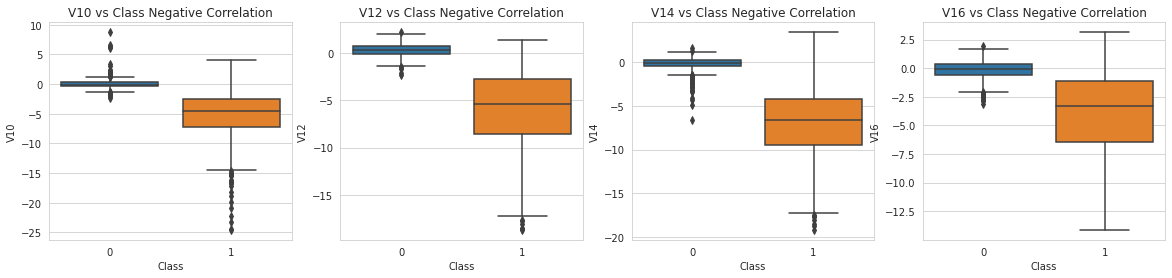

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V10", data=balanced_data, ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=balanced_data, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=balanced_data, ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V16", data=balanced_data, ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')

plt.show()

In [ ]:
#V10 Fraud
v10_fraud = balanced_data.V10[balanced_data.Class==1].values
Q_25 = np.percentile(v10_fraud, 25)
Q_75 = np.percentile(v10_fraud, 75)
V10_IQR_range = Q_75 - Q_25
V10_lower = Q_25 - 1.5 * V10_IQR_range
V10_upper = Q_75 + 1.5 * V10_IQR_range
balanced_data.drop(balanced_data[(balanced_data.V10 > V10_upper) | (balanced_data.V10 < V10_lower)].index, inplace=True)

#V10 Non-Fraud
v10_legit = balanced_data.V10[balanced_data.Class==0].values
Q_25 = np.percentile(v10_legit, 25)
Q_75 = np.percentile(v10_legit, 75)
V10_IQR_range = Q_75 - Q_25
V10_lower = Q_25 - 1.5 * V10_IQR_range
V10_upper = Q_75 + 1.5 * V10_IQR_range
balanced_data.drop(balanced_data[(balanced_data.V10 > V10_upper) | (balanced_data.V10 < V10_lower)].index, inplace=True)

#V14 Non-Fraud
v14_legit = balanced_data.V14[balanced_data.Class==0].values
Q_25 = np.percentile(v14_legit, 25)
Q_75 = np.percentile(v14_legit, 75)
V14_IQR_range = Q_75 - Q_25
V14_lower = Q_25 - 1.5 * V14_IQR_range
V14_upper = Q_75 + 1.5 * V14_IQR_range
balanced_data.drop(balanced_data[(balanced_data.V14 > V14_upper) | (balanced_data.V14 < V14_lower)].index, inplace=True)


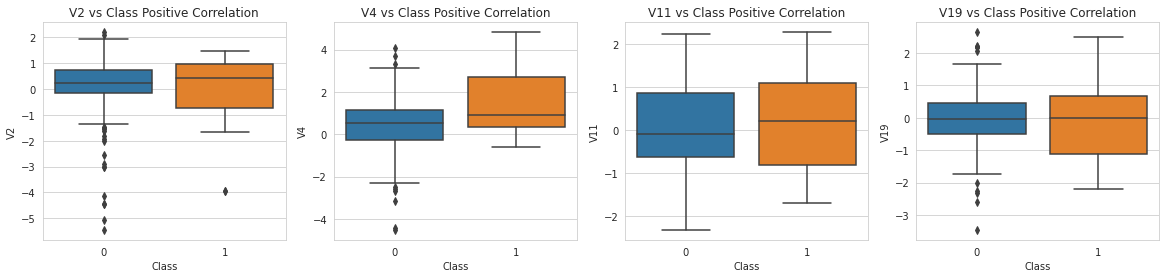

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Postive Correlations with our Class

sns.boxplot(x="Class", y="V2", data=balanced_data, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V4", data=balanced_data, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=balanced_data, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=balanced_data, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

In [ ]:
#V2 Fraud
v2_fraud = balanced_data.V2[balanced_data.Class==1].values
Q_25 = np.percentile(v2_fraud, 25)
Q_75 = np.percentile(v2_fraud, 75)
V2_IQR_range = Q_75 - Q_25
V2_lower = Q_25 - 1.5 * V2_IQR_range
V2_upper = Q_75 + 1.5 * V2_IQR_range
balanced_data.drop(balanced_data[(balanced_data.V2 > V2_upper) | (balanced_data.V2 < V2_lower)].index, inplace=True)

#V2 Non-Fraud
v2_legit = balanced_data.V2[balanced_data.Class==0].values
Q_25 = np.percentile(v2_legit, 25)
Q_75 = np.percentile(v2_legit, 75)
V2_IQR_range = Q_75 - Q_25
V2_lower = Q_25 - 1.5 * V2_IQR_range
V2_upper = Q_75 + 1.5 * V2_IQR_range
balanced_data.drop(balanced_data[(balanced_data.V2 > V2_upper) | (balanced_data.V2 < V2_lower)].index, inplace=True)

#V19 Non-Fraud
v19_legit = balanced_data.V19[balanced_data.Class==0].values
Q_25 = np.percentile(v19_legit, 25)
Q_75 = np.percentile(v19_legit, 75)
V19_IQR_range = Q_75 - Q_25
V19_lower = Q_25 - 1.5 * V19_IQR_range
V19_upper = Q_75 + 1.5 * V19_IQR_range
balanced_data.drop(balanced_data[(balanced_data.V19 > V19_upper) | (balanced_data.V19 < V19_lower)].index, inplace=True)


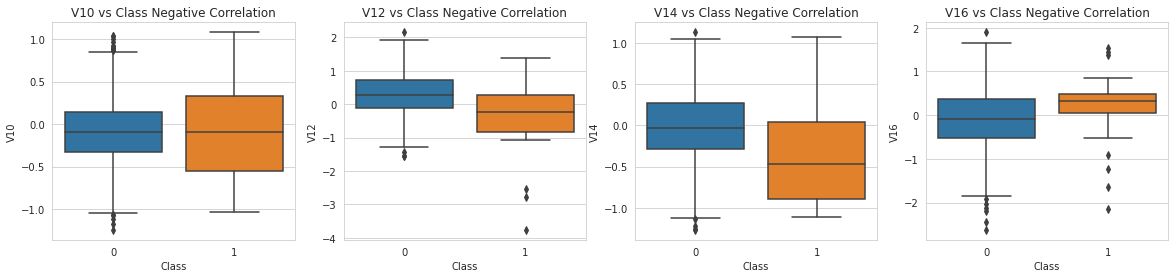

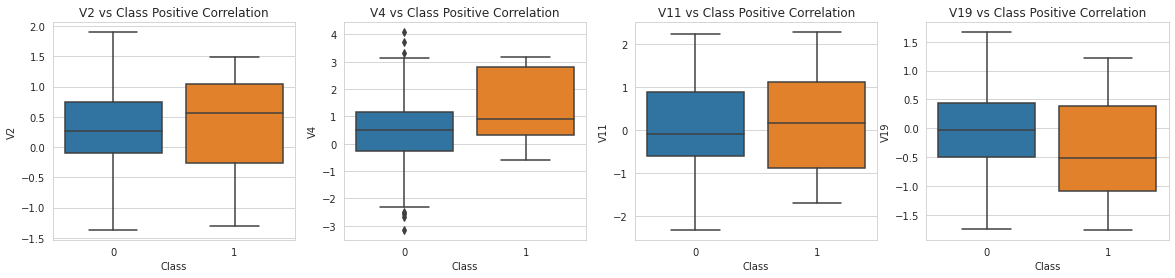

In [ ]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V10", data=balanced_data, ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=balanced_data, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V14", data=balanced_data, ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V16", data=balanced_data, ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')

plt.show()

f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Postive Correlations with our Class

sns.boxplot(x="Class", y="V2", data=balanced_data, ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V4", data=balanced_data, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=balanced_data, ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V19", data=balanced_data, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

#**Data Splitting**

In [ ]:
x=balanced_data.drop('Class',axis=1)
y=balanced_data['Class']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

In [ ]:
logmodel = LogisticRegression(max_iter= 150)
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)
accuracy_score(y_test, predictions)

0.9590163934426229

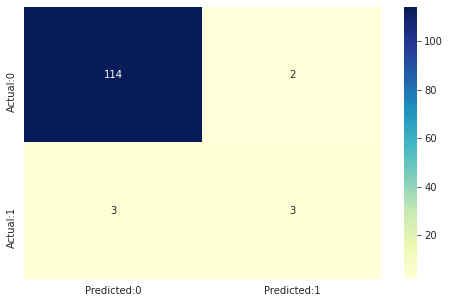

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
precision_score(y_test, predictions)

0.6

In [ ]:
recall_score(y_test, predictions)

0.5

In [ ]:
f1_score(y_test, predictions)

0.5454545454545454

In [ ]:
k = len(y_train)//20  #20 example per fold
kf = KFold(n_splits=k, random_state=None)
model = LogisticRegression()

acc_score = []
rec_score = []
for train_index , test_index in kf.split(x_train):
    X_Fold_train , X_Fold_test = x_train.iloc[train_index,:],x_train.iloc[test_index,:]
    y_Fold_train , y_Fold_test = y_train.iloc[train_index] , y_train.iloc[test_index]

    model.fit(X_Fold_train,y_Fold_train)
    pred_values = model.predict(X_Fold_test)

    acc = accuracy_score(pred_values, y_Fold_test)
    rec = recall_score(pred_values, y_Fold_test)
    acc_score.append(acc)
    rec_score.append(rec)

avg_acc_score = sum(acc_score)/k
avg_rec_score = sum(rec_score)/k

print('accuracy of each fold: ',acc_score)
print('Avg accuracy: ',avg_acc_score)
print('accuracy of each fold: ',rec_score)
print('Avg recall: ',avg_rec_score)

accuracy of each fold:  [0.9047619047619048, 0.9047619047619048, 0.9047619047619048, 1.0, 0.95, 1.0, 0.9, 0.95, 0.95, 0.95, 0.95, 1.0, 0.95, 0.9]
Avg accuracy:  0.9438775510204082
accuracy of each fold:  [0.0, 0.5, 0.5, 0.0, 0.0, 0.0, 0.6666666666666666, 0.0, 1.0, 0.0, 0.6666666666666666, 0.0, 0.0, 0.0]
Avg accuracy:  0.23809523809523808
